## EDA: pulizia, manipolazione e visualizzazione del dataset

Il dataframe in oggetto riporta dei dati riguardanti views, le impressions e le vendite di un'azienda operante in un ambito merceologico di natura sconosciuta. I dati sono organizzati nel seguente modo: ci sono 26 divisioni aziendali (una per ogni lettera dell'alfabeto) e ciascuna di esse riporta i dati con cadenza settimanale, per un periodo che parte dal gennaio del 2018 e termina all'alba del 2020.


L'obiettivo della seguente EDA è quello di analizzare le variazioni di alcune colonne nel corso del tempo, cercando dei pattern connessi alla stagionalità, correlazioni tra variabili e eterogeneità od omogeneità nelle performance delle diverse
divisioni registrate nel dataframe. 
Dopo una preliminare pulizia del dataframe avrò premura di commentare ciascun passaggio con una cella in markdown, per un formato di testo più leggibile.

Link dataset (Kaggle): https://www.kaggle.com/datasets/yugagrawal95/sample-media-spends-data

In [1]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [2]:
#import delle librerie necessarie

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("Sample Media Spend Data.csv")
df.head()

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,1/6/2018,392,422,408,349895.0107,73580,12072,682,59417
1,A,1/13/2018,787,904,110,506270.2176,11804,9499,853,56806
2,A,1/20/2018,81,970,742,430042.1538,52232,17048,759,48715
3,A,1/27/2018,25,575,65,417745.6658,78640,10207,942,72047
4,A,2/3/2018,565,284,295,408505.8012,40561,5834,658,56235


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               3051 non-null   object 
 1   Calendar_Week          3051 non-null   object 
 2   Paid_Views             3051 non-null   int64  
 3   Organic_Views          3051 non-null   int64  
 4   Google_Impressions     3051 non-null   int64  
 5   Email_Impressions      3051 non-null   float64
 6   Facebook_Impressions   3051 non-null   int64  
 7   Affiliate_Impressions  3051 non-null   int64  
 8   Overall_Views          3051 non-null   int64  
 9   Sales                  3051 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 238.5+ KB


### Operazioni preliminari di pulizia e trasformazione colonne

In [4]:
df[df.duplicated()]

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales


Non ci sono duplicati;

In [5]:
df.isna().sum()

Division                 0
Calendar_Week            0
Paid_Views               0
Organic_Views            0
Google_Impressions       0
Email_Impressions        0
Facebook_Impressions     0
Affiliate_Impressions    0
Overall_Views            0
Sales                    0
dtype: int64

Non ci sono dati mancanti, il nome delle colonne è OK. Mi interessa modificare il formato della data (cadenza settimanale)

In [6]:
#cambio datatype della colonna 'Calendar_Week'

df['Calendar_Week'] = pd.to_datetime(df['Calendar_Week'], format='%m/%d/%Y')

df["Calendar_Week"]  

0      2018-01-06
1      2018-01-13
2      2018-01-20
3      2018-01-27
4      2018-02-03
          ...    
3046   2020-02-01
3047   2020-02-08
3048   2020-02-15
3049   2020-02-22
3050   2020-02-29
Name: Calendar_Week, Length: 3051, dtype: datetime64[ns]

I dati sono raccolti con cadenza settimanale, per cui sono tutti riferiti allo stesso giorno della settimana (ovvero __Sabato__. Nella cella sotto utilizzo .dt.dayofweek, che restituisce 5, ovvero sabato poiché si inizia a contare da 0).
Questo elemento diminuisce drasticamente la variabilità delle impression dovute al variare dei comportamenti dei consumatori a seconda del giorno della settimana, rendendoci dei dati con meno rumore.

In [7]:
df["Calendar_Week"].dt.dayofweek.head(3)

0    5
1    5
2    5
Name: Calendar_Week, dtype: int32

In [8]:
df.Division.nunique()

26

In [9]:
divisioni = df.Division.unique()
divisioni

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

C'è una divisione per ciascuna delle 26 lettere dell'alfabeto; ogni Divisione ha 113 righe riferite alle stesse 113 settimane del periodo 2018 - 2020 (febbraio)


In [10]:
for lett in divisioni: 
    if ((df.Division==lett).sum()) != 113:
        print(f"Divisione {lett} non ha 113 righe")

Divisione Z non ha 113 righe


In [11]:
(df.Division=='Z').sum()

226

La Divisione Z ha il doppio delle righe; tuttavia dalla 113 alla 126, l'unico elemento uguale è il WeekCalendar; gli altri valori sono diversi.

In [12]:
df.query("Division == 'Z' and Calendar_Week == '2018-01-06'")

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
2825,Z,2018-01-06,165,346,440,939300.8528,156226,43811,223,113911
2938,Z,2018-01-06,887,376,940,512646.3434,89989,26445,317,60627


Seleziono solo la divisione Z dal dataframe; eseguo un groupby per 'accoppiare' le righe con la stessa data ed effettuo la media tra i valori; nella pagina del dataset non ci sono informazioni disponibili.

In [13]:
df_z = df.query("Division == 'Z'")
df_z1=df_z.groupby("Calendar_Week", as_index=False).agg({"Paid_Views":'mean',"Organic_Views":'mean',
                                                   "Google_Impressions":'mean',
                                                   "Email_Impressions":'mean',"Facebook_Impressions":'mean',
                               "Affiliate_Impressions":'mean',"Overall_Views":'mean',"Sales":'mean'})

df_z1["Division"] = 'Z'

Ora rimuovo dal dataframe originale le righe della divisione Z e le rimpiazzo, con un concat, con il nuovo dataframe di Z. 

In [14]:
df_z1

,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales,Division
0,2018-01-06,526.0,361.0,690.0,7.259736e+05,123107.5,35128.0,270.0,87269.0,Z
1,2018-01-13,193.5,433.5,229.0,1.049468e+06,19798.5,31213.5,454.5,93213.0,Z
2,2018-01-20,878.0,496.5,513.5,8.906127e+05,67991.5,46568.5,315.5,88845.0,Z
3,2018-01-27,321.0,423.5,422.0,8.664212e+05,112550.0,29365.0,495.5,103117.5,Z
4,2018-02-03,530.0,684.5,291.0,8.467239e+05,64150.0,22450.5,533.0,98888.5,Z
...,...,...,...,...,...,...,...,...,...,...
108,2020-02-01,40859.5,38816.0,904111.5,2.067245e+06,58318.0,16121.5,78877.5,113750.5,Z
109,2020-02-08,37301.0,41277.5,941720.0,7.568157e+05,284246.5,14151.5,77842.5,113226.5,Z
110,2020-02-15,35234.5,46791.0,656436.5,5.986443e+05,505421.0,15359.5,81595.0,198287.0,Z
111,2020-02-22,28721.0,44530.0,678104.0,8.624079e+05,518440.0,18366.0,71798.5,157312.5,Z


In [15]:
df_2 = df.query("Division != 'Z'")
df_3 =pd.concat([df_2, df_z1], axis=0).reset_index(drop=True)
df = df_3

Desidero aggiungere un dettaglio alla data, ovvero se si tratta di un giorno festivo o meno:

In [16]:
#importo una libreria che consente di verificare se le date inserite siano relative a delle festività del calendario statunitense; ho ipotizzato che i dati siano riferiti a US
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

#creo un istanza di calendar()
cal = calendar()
holiday = cal.holidays(start=df["Calendar_Week"].min(), end=df["Calendar_Week"].max())

df.loc[df['Calendar_Week'].isin(holiday)]

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales


Non ci sono giorni festivi, quindi non è necessario aggiungere una colonna con valori booleani per riportare se si tratta di un giorno di festività.

In [17]:
quant_cols = ['Paid_Views', 'Organic_Views', 'Google_Impressions',
              'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions', 'Overall_Views', 'Sales']

###  Analisi esplorativa 

In [18]:
stats = []

for col in quant_cols:
    mean = np.round(df[col].mean())
    std = np.round(df[col].std())
    cv = (std/mean)
    median = np.round(df[col].median())
    stats.append({"Nome colonna":col,
                  'Mediana':median,
                 'Media': mean,
                 'Deviazione Standard':std,
                 'Coefficiente di variazione':cv})

stats_df = pd.DataFrame(stats)
pd.pivot_table(stats_df, index=stats_df["Nome colonna"])
# Una tabella simile sarebbe ottenibile dal metodo .describe() disponibile per le colonne dei dataframe popolate da valori numerici; tuttavia ho optato per questo tipo di rappresentazione per una visualizzazione più pulita;

,Coefficiente di variazione,Deviazione Standard,Media,Mediana
Nome colonna,,,,
Affiliate_Impressions,0.952437,21907.0,23001.0,16330.0
Email_Impressions,0.833564,632441.0,758719.0,590964.0
Facebook_Impressions,1.741468,469390.0,269537.0,127166.0
Google_Impressions,1.540405,1365064.0,886172.0,487732.0
Organic_Views,1.819532,24258.0,13332.0,4091.0
Overall_Views,1.875464,52528.0,28008.0,7708.0
Paid_Views,2.052291,31084.0,15146.0,2664.0
Sales,1.256322,235304.0,187296.0,112728.0


I valori sono molto dispersi per tutte le variabili quantitative, come anche mostrato graficamente dai boxplots:

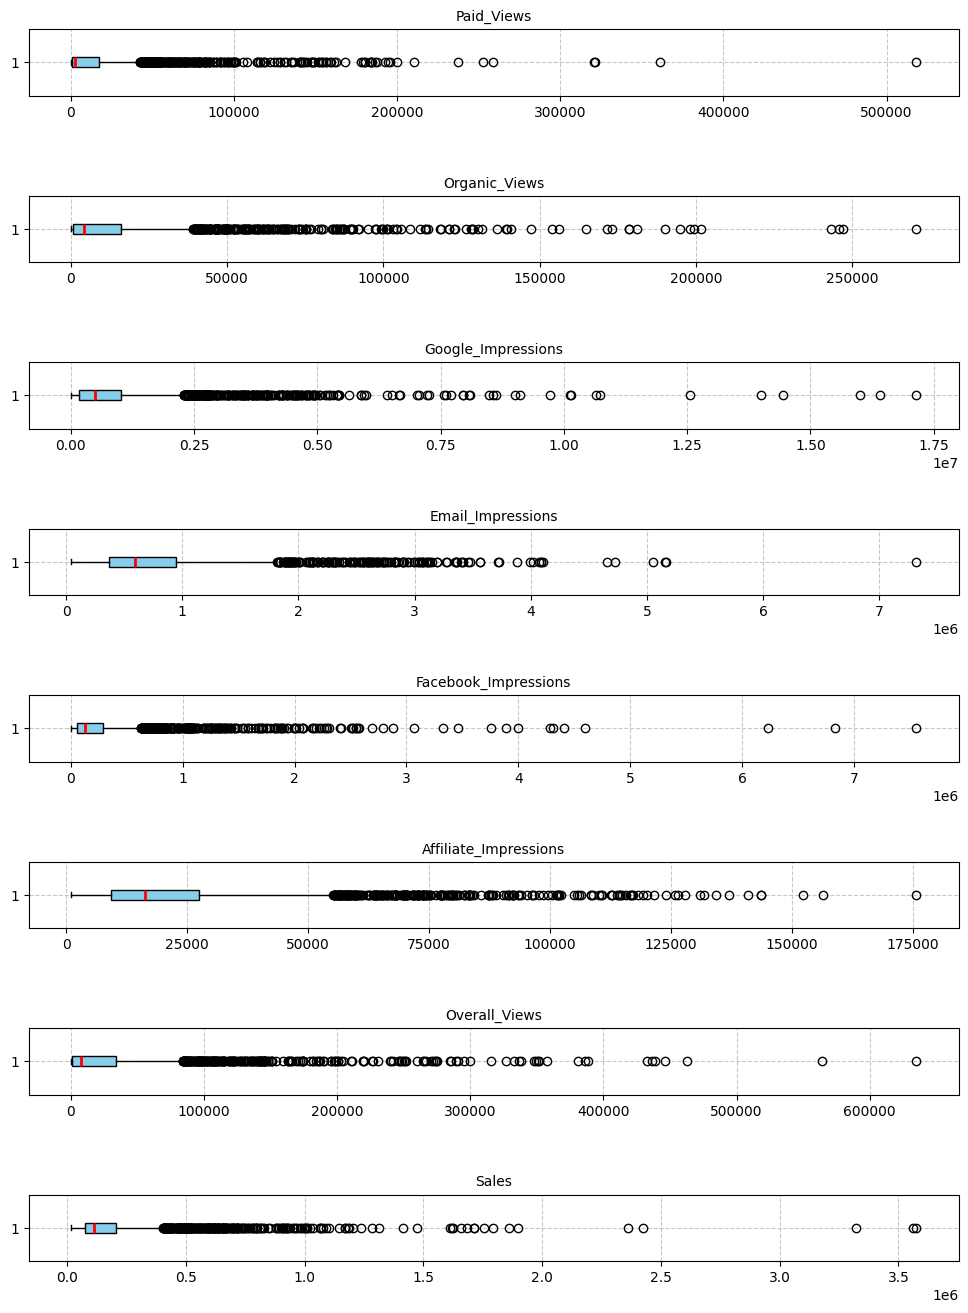

In [19]:
nrows = len(df[quant_cols].columns)
fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(12,16))
fig.subplots_adjust(hspace=1.5)
for ax, col in zip(axes, df[quant_cols]):
    ax.boxplot(df[col], vert=False, patch_artist=True,
              boxprops={'color':'black', 'facecolor':'skyblue'},
              medianprops={'lw':2,'color':'red'})
    ax.set_title(col, fontsize=10, fontweight="ultralight")
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xscale('linear')

plt.show()

Quando le distribuzioni sono così disperse e così fortemente asimmetriche (positivamente, in questo caso)
è opportuno ricorrere alla __mediana (una linea rossa in ciascun boxplot sopra)__ per avere una misura più robusta della tendenza centrale, in quanto meno
sensibile ai valori estremi rispetto alla media, che viene trascinata verso l'estremità a cui tendono i grandi valori nonché possibili outlier.

I boxplot ci mostrano come ciascuna colonna ha dei valori (associati ciascuno ad un giorno diverso) molto dispersi, che ci mostra come queste metriche non sono state assolutamente costanti nel tempo. Non è necessariamente un brutto segno, anzi: più avanti verrà mostrato come il trend generale è in crescita. Questa contingenza è compatibile con l'idea che si tratti di un'azienda in forte crescita, nata nel 2018 o poco prima.

## Analisi Stagionale

Creazione di una colonna per la stagione:

In [20]:
# una funzione per associare ciascun mese alla stagione più opportuna

def stagioni_conv(numero):
    if numero in [12, 1, 2]:
        return "Inverno"
    elif numero in [3, 4, 5]:
        return "Primavera"
    elif numero in [6, 7, 8]:
        return "Estate"
    elif numero in [9, 10, 11]:
        return "Autunno"

In [21]:
df["Stagione"] = df["Calendar_Week"].dt.month.apply(stagioni_conv)

In [22]:
seasons_df = df.groupby("Stagione")["Sales"].agg(['mean', 'median', 'sum']).sort_values(by="sum").rename(columns={
        'mean': 'Media_Vendite',
        'median': 'Mediana_Vendite',
        'sum': 'Totale_Vendite'
    })
seasons_df

,Media_Vendite,Mediana_Vendite,Totale_Vendite
Stagione,,,
Primavera,130929.948225,89354.50,88508645.0
Estate,136249.248575,88914.00,95646972.5
Autunno,269294.647929,164362.50,182043182.0
Inverno,208232.808824,124712.25,184077803.0


Inverno ed autunno outperformano le altre due stagioni in merito alle vendite. E le views?

In [23]:
seasons_df_views = df.groupby("Stagione")["Overall_Views"].agg(['mean', 'median', 'sum']).sort_values(by="sum").rename(columns={
        'mean': 'Media_Views',
        'median': 'Mediana_Views',
        'sum': 'Totale_Views'
    })
seasons_df_views 

,Media_Views,Mediana_Views,Totale_Views
Stagione,,,
Primavera,10391.428254,990.5,7024605.5
Autunno,24759.982988,8866.0,16737748.5
Inverno,30213.776018,15220.0,26708978.0
Estate,45320.918803,6943.5,31815285.0


Il discorso si capovolge: l'estate supera di gran lunga le altre tre stagioni, diventando la stagione meno efficiente tra le quattro.

In [24]:
df["Stagione"].value_counts()

Stagione
Inverno      884
Estate       702
Primavera    676
Autunno      676
Name: count, dtype: int64

Nel dataframe ci sono più giorni invernali che altri. Questo perché il dataframe riporta le date fino alle prime settimane del 2020, che sono invernali; per attenuarne gli effetti calcolo la somma delle vendite e la divido per il totale dei giorni stagionali: 

In [25]:
stagioni = df["Stagione"].unique()

#divido il totale delle vendite per numero di giorni della stessa stagione, visto che l'inverno ha più giorni nel DF. Cerco di ottenere un valore numerico per le vendite ponderate per il numero di date riportate:
    
for i,stagione in enumerate(stagioni):
    print(f'Stagione: {stagione}', np.round(df.loc[df["Stagione"] == stagioni[i]]["Sales"].sum() / df.loc[df["Stagione"] == stagioni[i]].shape[0]))  

Stagione: Inverno 208233.0
Stagione: Primavera 130930.0
Stagione: Estate 136249.0
Stagione: Autunno 269295.0


La media giornaliera nelle stagioni fredde è desisamente più alta rispetto alle controparti più calde. Con i grafici di sotto vedremo come le vendite nelle diverse stagioni si attestano su diversi ordini di grandezza:

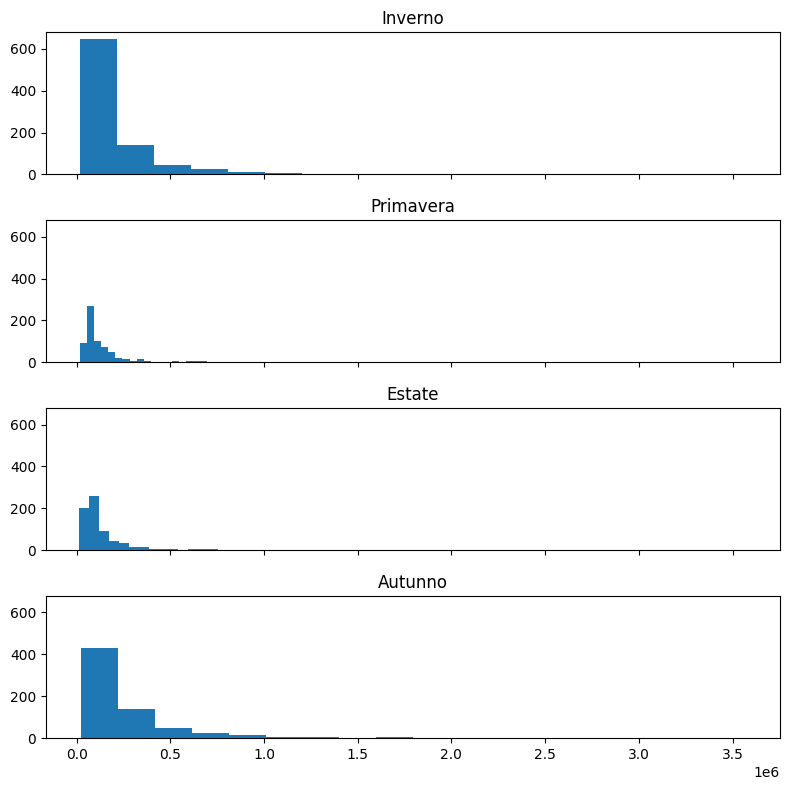

In [26]:
stagioni = df["Stagione"].unique()

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,8), sharey=True, sharex=True)

for i, stagione in enumerate(stagioni):
    ax[i].hist(df['Sales'].loc[df["Stagione"] == stagione], bins=18)
    ax[i].set_title(stagione)
    ax[i].set_xscale('linear')
    
fig.tight_layout()
plt.show()

In [27]:
import plotly.express as px

#creo un grafico più interattivo per ottenere maggiori informazioni riguardo ciascuna delle stagioni

fig = px.box(df, x="Stagione", y="Sales",
            width=1800, height=500, color='Stagione')

fig.update_layout(
    title = "Variabilità nelle vendite giornaliere",
    title_font={'size':18},
    title_x = 0.5,
    legend=dict(
        x=0.9, 
        y=1.01,  
        title_text="Stagione",
        bgcolor='rgba(0,0,0,0)'
    )
)
fig.show()

Entrambi i grafici mostrano come nelle stagioni più fredde i volumi siano maggiori; la forma della distribuzione nelle diverse stagioni è pressoché identica: fortemente asimmetrica verso destra, ovvero con asimmetria positiva. 
Le giornate dei mesi invernali e autunnali sono più profittevoli rispetto a quelle degli altri due mesi.

In [28]:
import plotly.express as px

fig = px.box(df, x="Stagione", y="Overall_Views",
            width=1800, height=500, color='Stagione')

fig.update_layout(
    title = "Variabilità nelle Views giornaliere",
    title_font={'size':18},
    title_x = 0.5,
    legend=dict(
        x=0.9, 
        y=1.01,  
        title_text="Stagione",
        bgcolor='rgba(0,0,0,0)'
    )
)
fig.show()

L'estate sembra avere numeri ben più consistenti nelle 'Overall Views' eppure risulta meno performante nelle vendite; analizziamo quali sono i parametri meglio correlati tra loro e, più scrupolosamente, con le vendite:

<Axes: >

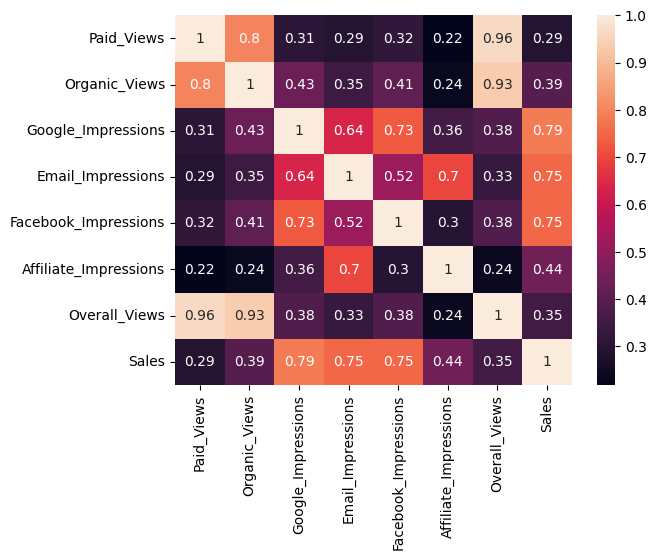

In [29]:
matr = df.loc[:,"Paid_Views":"Sales"].corr()

sns.heatmap(matr, annot=True)

Si nota come le vendite siano fortemente correlate con le impressions su Google, Facebook e per Email; le views organiche sembrano performare meglio di quelle ottenute per pubblicità. 

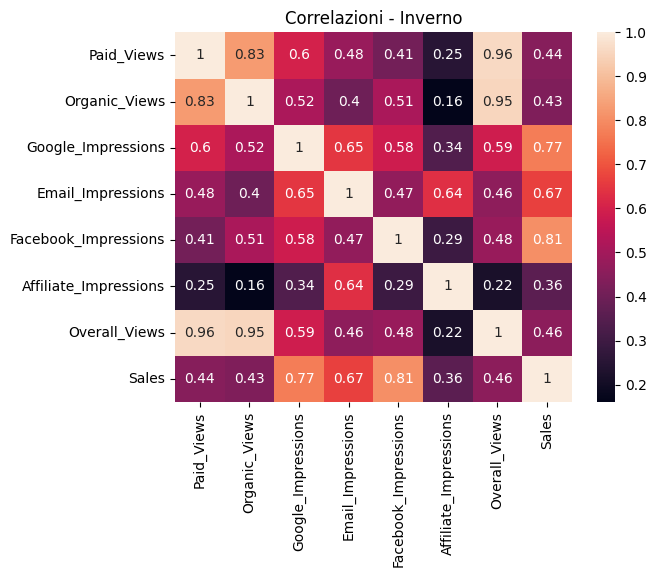

In [30]:
matr_inverno = df.loc[df["Stagione"] == 'Inverno', "Paid_Views":"Sales"].corr()
sns.heatmap(matr_inverno, annot=True)
plt.title("Correlazioni - Inverno");

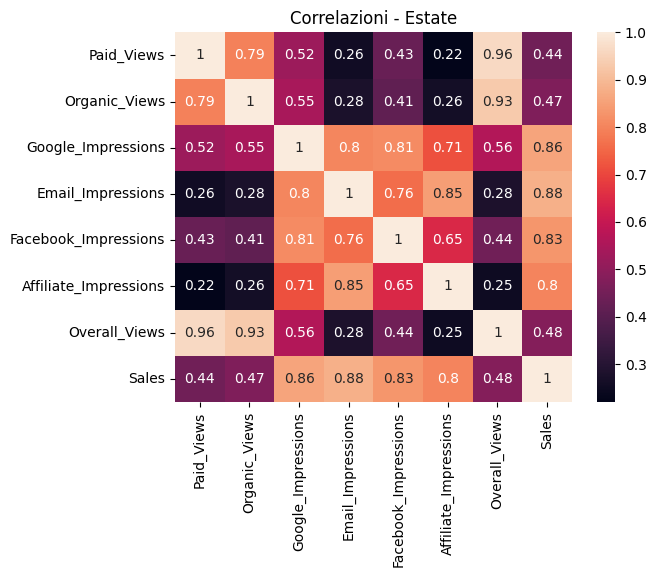

In [31]:
matr_estate = df.loc[df["Stagione"] == 'Estate', "Paid_Views":"Sales"].corr()
sns.heatmap(matr_estate, annot=True)
plt.title("Correlazioni - Estate");

Google, Facebook e le e-mail sembrano essere le colonne portanti della conversione da impression a vendita, con coefficiente di correlazione pari o superiore a 0.8.

Le 'Affiliate Impressions' mostrano una correlazione con le vendite molto sensibile alla stagione: in Estate si aggiungono alle tre sopracitate tra le più correlate, mentre la sua correlazione riscende in Inverno allo 0.44. 

Osserviamo da più vicino l'andamento di queste tre features rispetto a quello delle vendite:

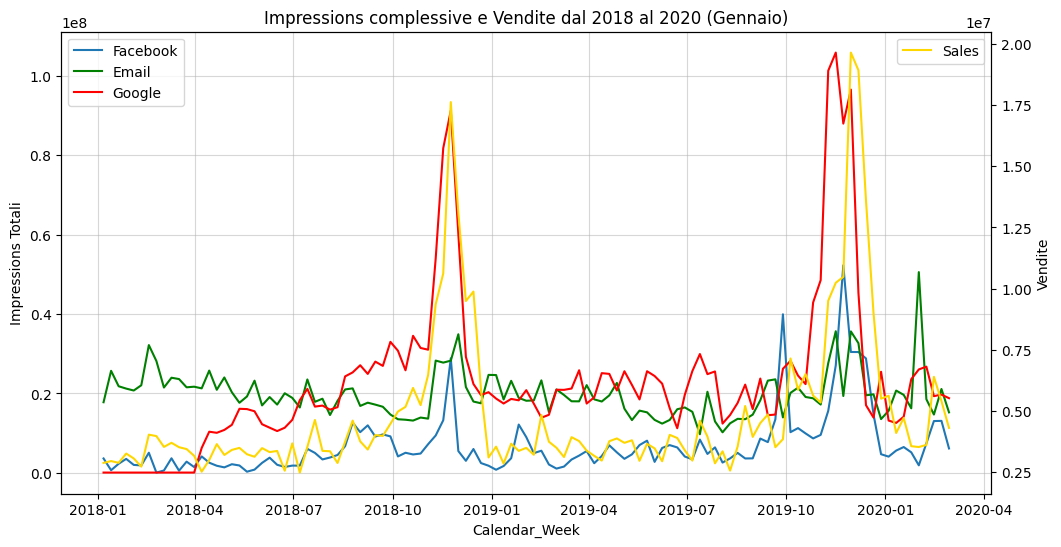

In [32]:
plt.figure(figsize=(12, 6))

ax1 = sns.lineplot(data=df, y="Facebook_Impressions", x="Calendar_Week", estimator='sum', errorbar=None, label='Facebook')
sns.lineplot(data=df, y="Email_Impressions", x="Calendar_Week", estimator='sum', errorbar=None, label='Email', color='green', ax=ax1)
sns.lineplot(data=df, y="Google_Impressions", x="Calendar_Week", estimator='sum', errorbar=None, label='Google', color='r', ax=ax1)
ax1.set_ylabel("Impressions Totali")
ax1.grid(alpha=0.5)

ax2 = ax1.twinx()
sns.lineplot(data=df, y="Sales", x="Calendar_Week", estimator='sum', errorbar=None, label='Sales', color='gold', ax=ax2)
ax2.set_ylabel("Vendite")

plt.title("Impressions complessive e Vendite dal 2018 al 2020 (Gennaio)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

Notiamo come l'andamento delle Vendite sia coerente con quello delle impressions da Google, Facebook e per Email; non dovrebbe assolutamente sorprenderci, vista l'elevata correlazione tra ciascuna di quelle tre fonti e le Vendite. 

Ora poniamo l'attenzione sulle views pagate ed organiche:

In [33]:
print("Somma Impressions pagate:", df["Paid_Views"].sum())
print("Somma Impressions organiche:", df["Organic_Views"].sum())

Somma Impressions pagate: 44497754.0
Somma Impressions organiche: 39169428.0


I valori non sono troppo distanti l'uno dall'altro;

sono stabili, nel tempo, le views?

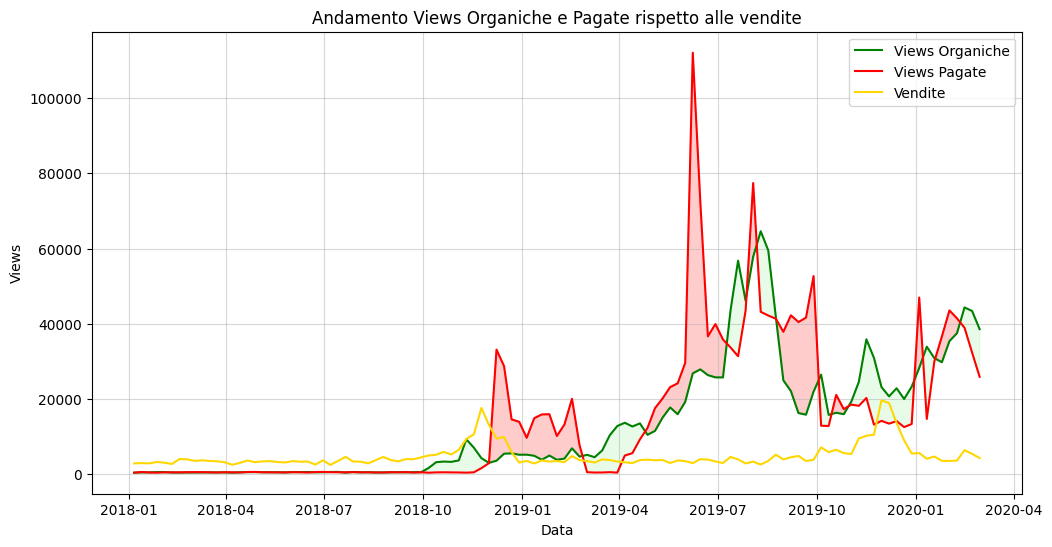

In [34]:
views_df = df.groupby("Calendar_Week")[["Paid_Views","Organic_Views"]].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=views_df, x='Calendar_Week', y='Organic_Views', label='Views Organiche', errorbar=None, color='green')
sns.lineplot(data=views_df, x='Calendar_Week', y='Paid_Views', label='Views Pagate', errorbar=None, color='red')
sns.lineplot(data=df, x='Calendar_Week', y=pd.to_numeric(df['Sales'])/1000, estimator='sum', errorbar=None, label='Vendite', color='gold')

ax.fill_between(
    views_df["Calendar_Week"], views_df["Organic_Views"], views_df["Paid_Views"],
    where=(views_df["Organic_Views"] < views_df["Paid_Views"]),
    color='red', interpolate=True, alpha=0.2)

ax.fill_between(
    views_df["Calendar_Week"], views_df["Organic_Views"], views_df["Paid_Views"],
    where=(views_df["Organic_Views"] > views_df["Paid_Views"]),
    color='lightgreen', interpolate=True, alpha=0.2)

ax.set_xlabel("Data")
ax.set_ylabel("Views")
ax.set_title("Andamento Views Organiche e Pagate rispetto alle vendite")
plt.grid(alpha=0.5)
plt.show()

Il grafico mostra come le visite organiche e pagate abbiano generalmente valori della stessa magnitudine, con delle eccezioni in cui le une superano le altre e viceversa. 

Vi è un lungo tratto in cui entrambe le views aumentano visibilmente (dall'estate 2019 all'autunno dello stesso anno) senza però che vi sia stata alcuna modifica nelle Vendite.

Va fatta quindi una considerazione sulla correlazione tra queste due variabili e le vendite: premesso che, non avendo altri dati a disposizione, potremmo essere costretti a supporre che non si tratti né di una correlazione spuria né di una catena e che quindi le due variabili siano naturalmente connesse secondo quel valore, potrebbe essere opportuno per l'azienda rivedere la propria strategia di marketing per quanto riguarda le views ottenute a pagamento. 
Un valore di 0.29 indica, secondo la codificazione tradizionale, una correlazione bassa: dunque la variabile 'Vendite' non è molto sensibile alla variabile 'Views a pagamento'. Se calcolassimo r2, che ci dice la variabilità di Y ('Sales') rispetto ad X ('Paid_Views'), otterremmo un valore pari circa a 0.08 (bassissimo).

Se escludessimo l'ipotesi secondo cui le Paid Views non possano incidere come le altre variabili sul valore delle vendite (un'ipotesi non impossibile ma comunque non verosimile), riterremmo che le views a pagamento potrebbero aumentare la propria efficacia e, i modi per conseguirlo, non sono molti. Il principale è quello di ridiscutere il target della pubblicità: quasi tutte le piattaforme che concedono gli spazi pubblicitari, consentono all'inserzionista di scegliere a quale segmento rivolgere i propri annunci. Una correlazione così bassa potrebbe essere dovuta ad una bassa compatibilità col pubblico raggiunto mediante le sponsorizzazioni a pagamento; pertanto si potrebbe sperimentare la stessa campagna pubblicitaria ma con un target diverso e notare eventuali migliorie o peggioramenti. 

E' bene ricordare infatti che le views a pagamento sono quelle con il bias di selezione più basso possibile: il target a cui viene mostrato un contenuto multimediale dietro pagamento non ha scelto deliberatamente di visualizzarlo, come invece potrebbe accadere per altri tipi di visualizzazioni (come un video su Youtube od un annuncio aperto dalla propria casella postale).

## Analisi per Divisioni: la mosca bianca 'B'

In [35]:
division_sales = df.groupby("Division")["Sales"].mean().sort_values(ascending=False).reset_index()

fig = px.bar(division_sales, x='Division', y='Sales', color='Sales',
      title='Vendite per Divisione')

fig.update_layout(
    font_color="black",
    title_font_color="black",
    legend = dict(
        title_font_color="black",
        title='Vendite'),
    title={'xanchor': 'center',
         'yanchor': 'top',
          'y':0.85,
         'x':0.5,},
    yaxis_title='Vendite',
    xaxis_title="Divisione"
)
#calcolo per outlier
low = np.quantile(division_sales["Sales"], 0.25)
up = np.quantile(division_sales["Sales"], 0.75)

iqr = up-low
up_outlier = up + (1.5*iqr)

fig.add_hline(y=up_outlier, annotation_text='soglia Outlier',
             annotation_position="top", line_dash='dot',
             )

Notiamo dal grafico che __B__ ed __E__ sono degli outlier positivi.

Esistono outlier negativi? No, perché il range interquartile è tale da rendere la soglia per gli outlier inferiore allo 0.
La scala dei colori ci aiuta ad apprezzare l'omogeneità nei valori per tutte le divisioni.

__Efficienza pubblicitaria__: calcolo l'efficienza di ciascuna divisione dividendo le vendite per le views complessive:


In [36]:
df['Efficienza'] = df["Sales"] / df["Overall_Views"] 
division_efficiency = df.groupby("Division")["Efficienza"].mean().sort_values(ascending=False).reset_index()
fig = px.bar(division_efficiency, x='Division', y='Efficienza',  color='Efficienza', title='Punteggio di Efficienza: Vendita per view')
fig.update_layout(
    font_color="black",
    title_font_color="black",
    legend_title_font_color="black",
    title={'xanchor': 'center',
         'yanchor': 'top',
          'y':0.85,
         'x':0.5,},
    yaxis_title='Efficienza',
    xaxis_title="Divisione"
)

Le divisioni __B S Q V O G__ sono le più efficienti; __T H A R Z W__ le meno efficienti

Le diverse divisioni mostrano un andamento simile tra loro nel tempo:

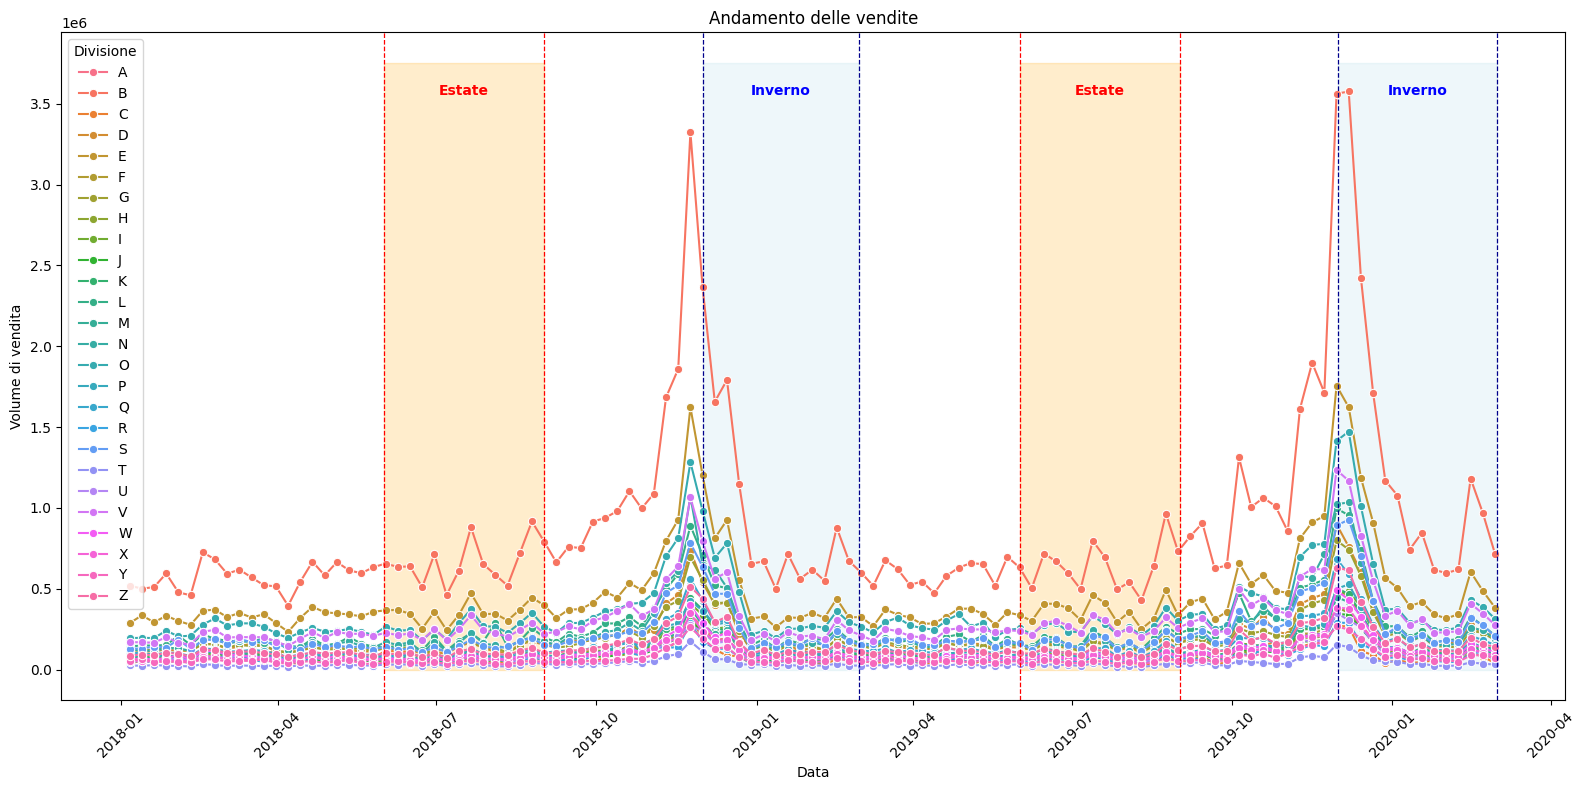

In [37]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x='Calendar_Week', y='Sales', hue='Division', marker='o', estimator='sum')
plt.title("Andamento delle vendite")
plt.xlabel("Data")
plt.ylabel("Volume di vendita")
plt.legend(title='Divisione')
plt.xticks(rotation=45)
plt.tight_layout()

inizio_inverno = [pd.to_datetime('2018-12-01'), pd.to_datetime('2019-12-01')]
fine_inverno = [pd.to_datetime('2019-03-01'), pd.to_datetime('2020-03-01')]

inizio_estate = [pd.to_datetime('2018-06-01'), pd.to_datetime('2019-06-01')]
fine_estate = [pd.to_datetime('2018-09-01'), pd.to_datetime('2019-09-01')]

ymax = plt.gca().get_ylim()[1]

for inizio, fine in zip(inizio_inverno, fine_inverno):
    plt.axvline(inizio, color='darkblue', linestyle='--', lw=0.9)
    plt.axvline(fine, color='darkblue', linestyle='--', lw=0.9)
    centro = inizio + (fine - inizio) / 2
    plt.text(centro, df["Sales"].max(), 'Inverno',
             color='blue', ha='center', va='center', fontsize=10, fontweight='bold', rotation=0)
    plt.fill_betweenx(y=[0, ymax], x1=inizio, x2=fine, 
                      color='lightblue', alpha=0.2)

for inizio, fine in zip(inizio_estate, fine_estate):
    plt.axvline(inizio, color='red', linestyle='--', lw=0.9)
    plt.axvline(fine, color='red', linestyle='--', lw=0.9)
    centro = inizio + (fine - inizio) / 2
    plt.text(centro, df["Sales"].max(), 'Estate',
             color='red', ha='center', va='center', fontsize=10, fontweight='bold', rotation=0)
    plt.fill_betweenx(y=[0, ymax], x1=inizio, x2=fine, 
                      color='orange', alpha=0.2)

plt.show()

Questo grafico ha il solo scopo di sottolineare come tutte le divisioni seguano lo stesso pattern nelle vendite, con un picco in prossimità della stagione invernale a prescindere dai volumi di vendite complessivi registrati nel tempo.


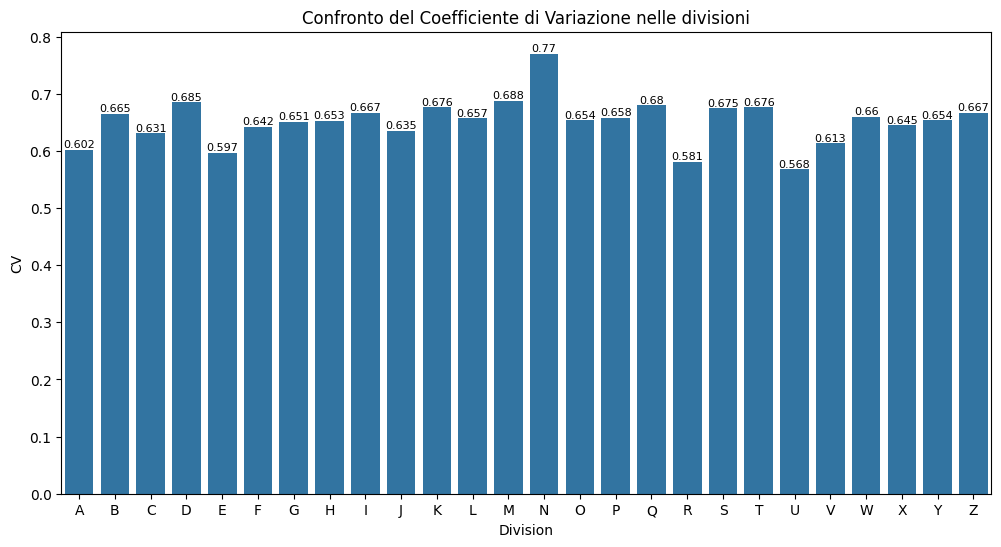

In [38]:
df_sales_cv = (df.groupby("Division")["Sales"].std()/df.groupby("Division")["Sales"].mean()).reset_index()
df_sales_cv["Sales"] = np.round(df_sales_cv["Sales"], 3)

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(data=df_sales_cv, x='Division', y='Sales')
ax.bar_label(ax.containers[0], fontsize=8);

plt.ylabel("CV")
plt.title("Confronto del Coefficiente di Variazione nelle divisioni");

Perché uso il Coefficiente di variazione e non la media o la deviazione standard? 
Trattandosi di dati con un ampia dispersione, preferisco utilizzare questa metrica standardizzata per poter mostrare meglio come tutte le divisioni presentano dati entro la stessa scala di variabilità.

__Rolling Average: Esponenziale e Semplice__

La prima delle due è più sensibile alle variazioni recenti: trattandosi di un periodo relativamente breve e recente, è più opportuno ponderare maggiormente le vendite più vicine nel tempo per apprezzare meglio l'andamento delle vendite.
Verranno comunque calcolate entrambe:

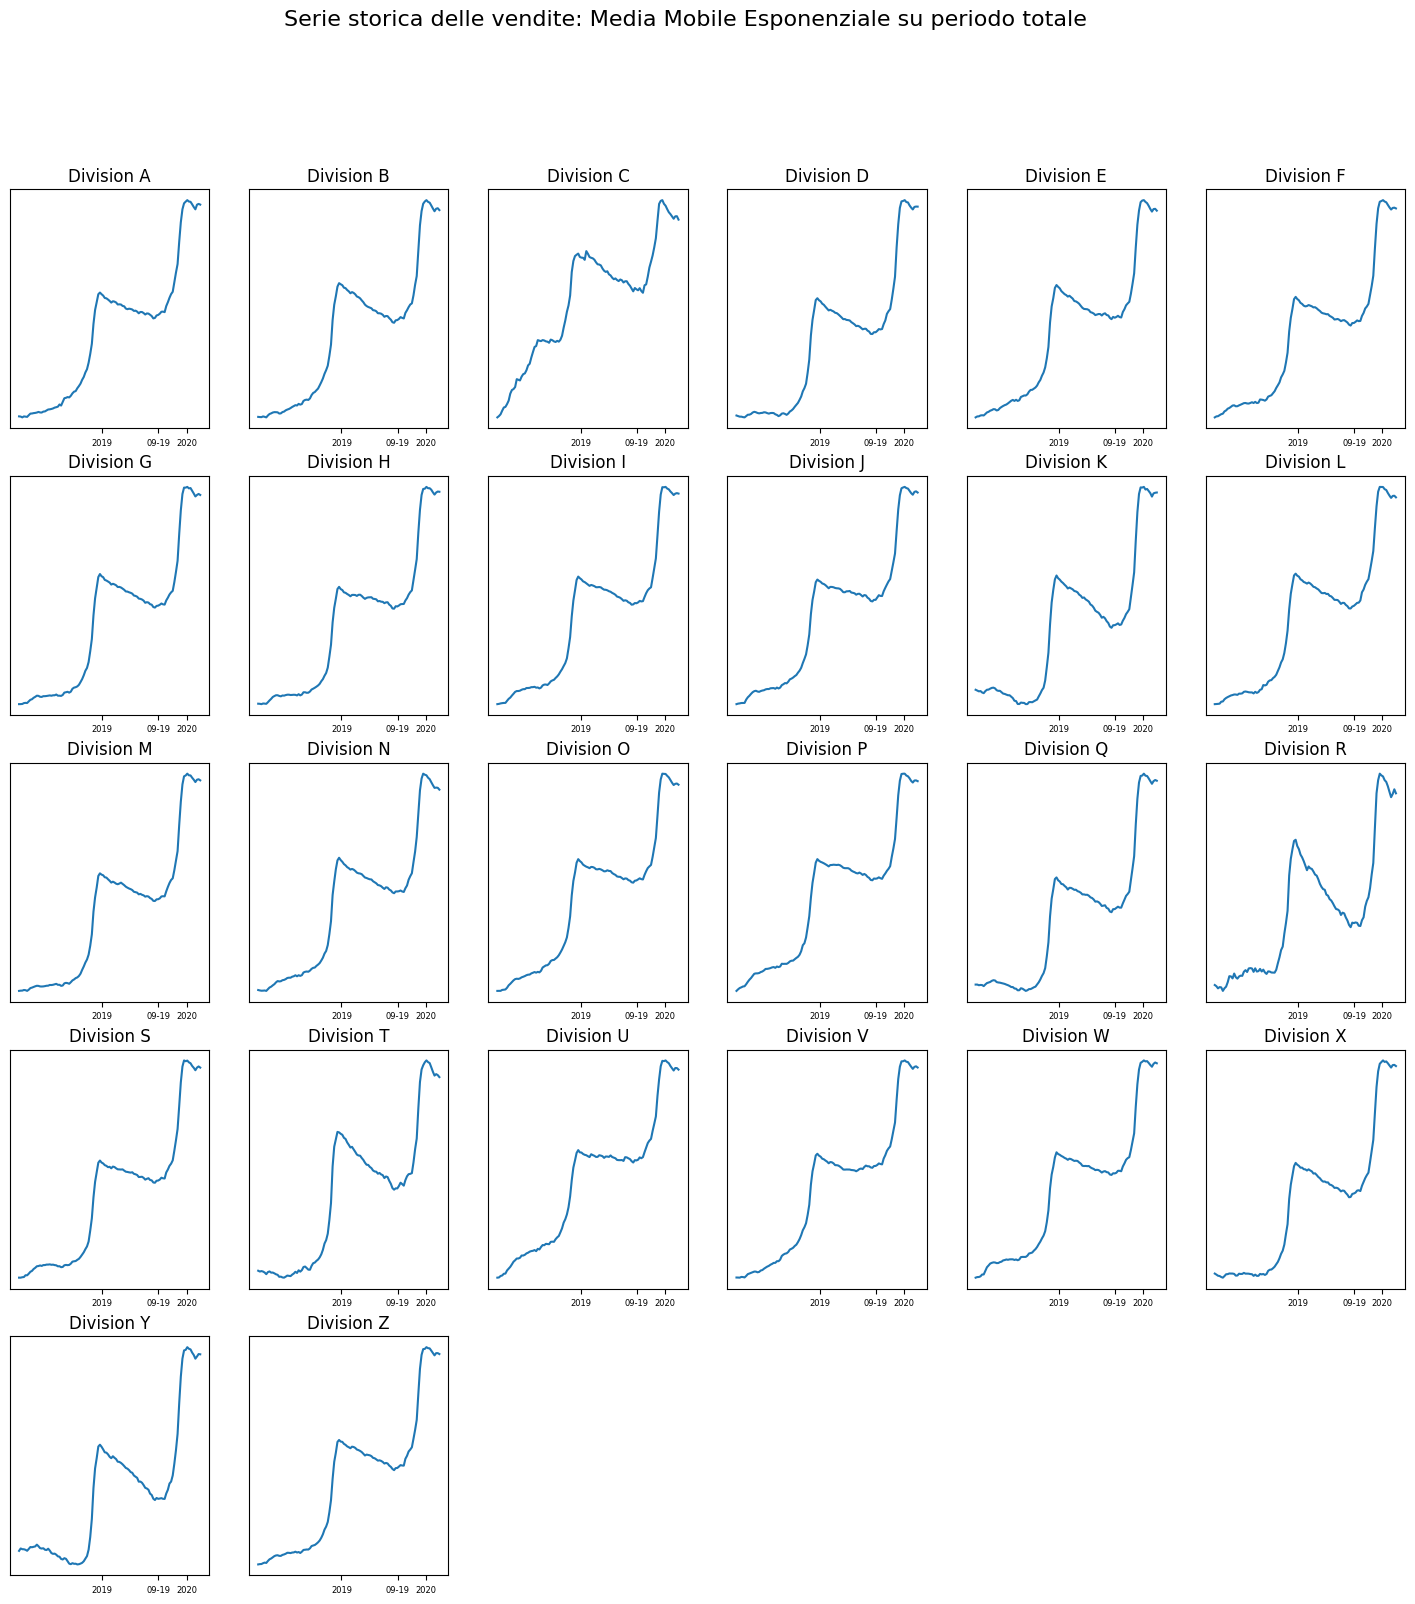

In [39]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18,18))
fig.suptitle('Serie storica delle vendite: Media Mobile Esponenziale su periodo totale', fontsize=16)

for i, lett in enumerate(df.Division.unique().tolist()):
    riga = i//6
    colonna = i%6
    df_temp = df.loc[df["Division"] == lett]
    # calcolo la media mobile esponenziale, periodo intero
    mean_serie = df_temp["Sales"].transform(lambda x: x.ewm(span=113, adjust=False).mean())
    axes[riga, colonna].plot(df_temp["Calendar_Week"], mean_serie, label=f"Division {lett}")
    axes[riga, colonna].set_title(f"Division {lett}")
    
    axes[riga, colonna].set_xticks([pd.to_datetime('2019-01-01'), pd.to_datetime('2019-09-01'), pd.to_datetime('2020-01-01')])
    axes[riga, colonna].set_xticklabels(['2019', '09-19', '2020'], fontsize=6,  rotation=0)    
    axes[riga, colonna].set_yticks([])


for j in range(i + 1, 5 * 6):
    fig.delaxes(axes[j // 6, j % 6])

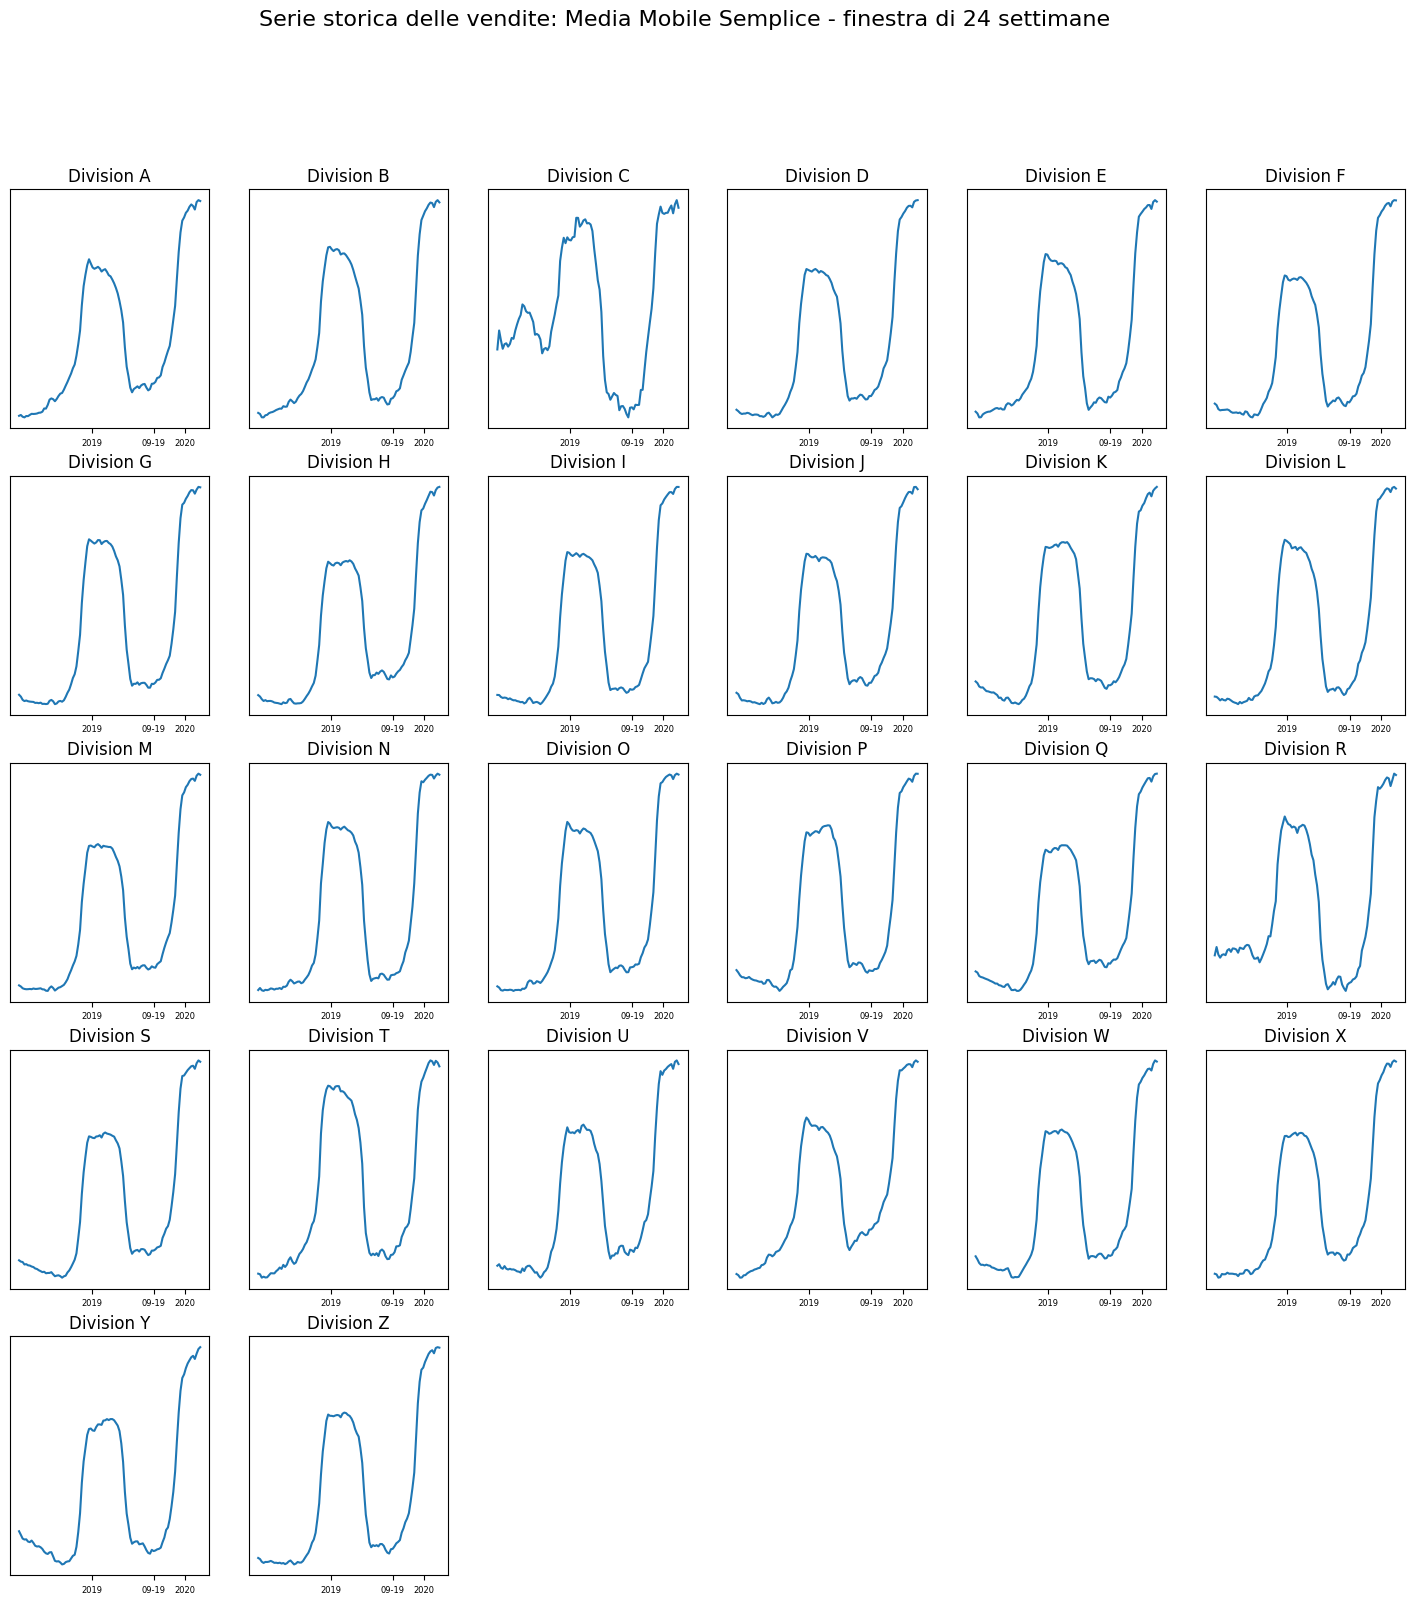

In [40]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18,18))
fig.suptitle('Serie storica delle vendite: Media Mobile Semplice - finestra di 24 settimane', fontsize=16)

for i, lett in enumerate(df.Division.unique().tolist()):
    riga = i//6
    colonna = i%6
    df_temp = df.loc[df["Division"] == lett]
    mean_serie = df_temp["Sales"].transform(lambda x: x.rolling(window=24, min_periods=12).mean())
    axes[riga, colonna].plot(df_temp["Calendar_Week"], mean_serie, label=f"Division {lett}")
    axes[riga, colonna].set_title(f"Division {lett}")
    
    axes[riga, colonna].set_xticks([pd.to_datetime('2019-01-01'), pd.to_datetime('2019-09-01'), pd.to_datetime('2020-01-01')])
    axes[riga, colonna].set_xticklabels(['2019', '09-19', '2020'], fontsize=6,  rotation=0)    
    axes[riga, colonna].set_yticks([])

for j in range(i + 1, 5 * 6):
    fig.delaxes(axes[j // 6, j % 6])


Complessivamente si può notare come tutte le divisioni seguano lo stesso pattern nel tempo, con due picchi ottenute nei due inverni trascorsi, separati da un punto minimo attorno al settembre del 2019 al termine di un calo iniziato dopo l'inverno.

__La media mobile__ mostra come, complessivamente, le vendite siano aumentate nel tempo.

E' possibile aumentare il volume delle vendite nelle stagioni in cui si è meno performanti?
Dipende dalla natura del business. Se si trattasse, ad esempio, di un'azienda di panettoni o di articoli da scii, la risposta sarebbe ovviamente negativa. 
Conoscere la natura merceologica è dirimente per poter dare una risposta più precisa in merito.
Calcoliamo la media mobile semplice per le Views complessive:

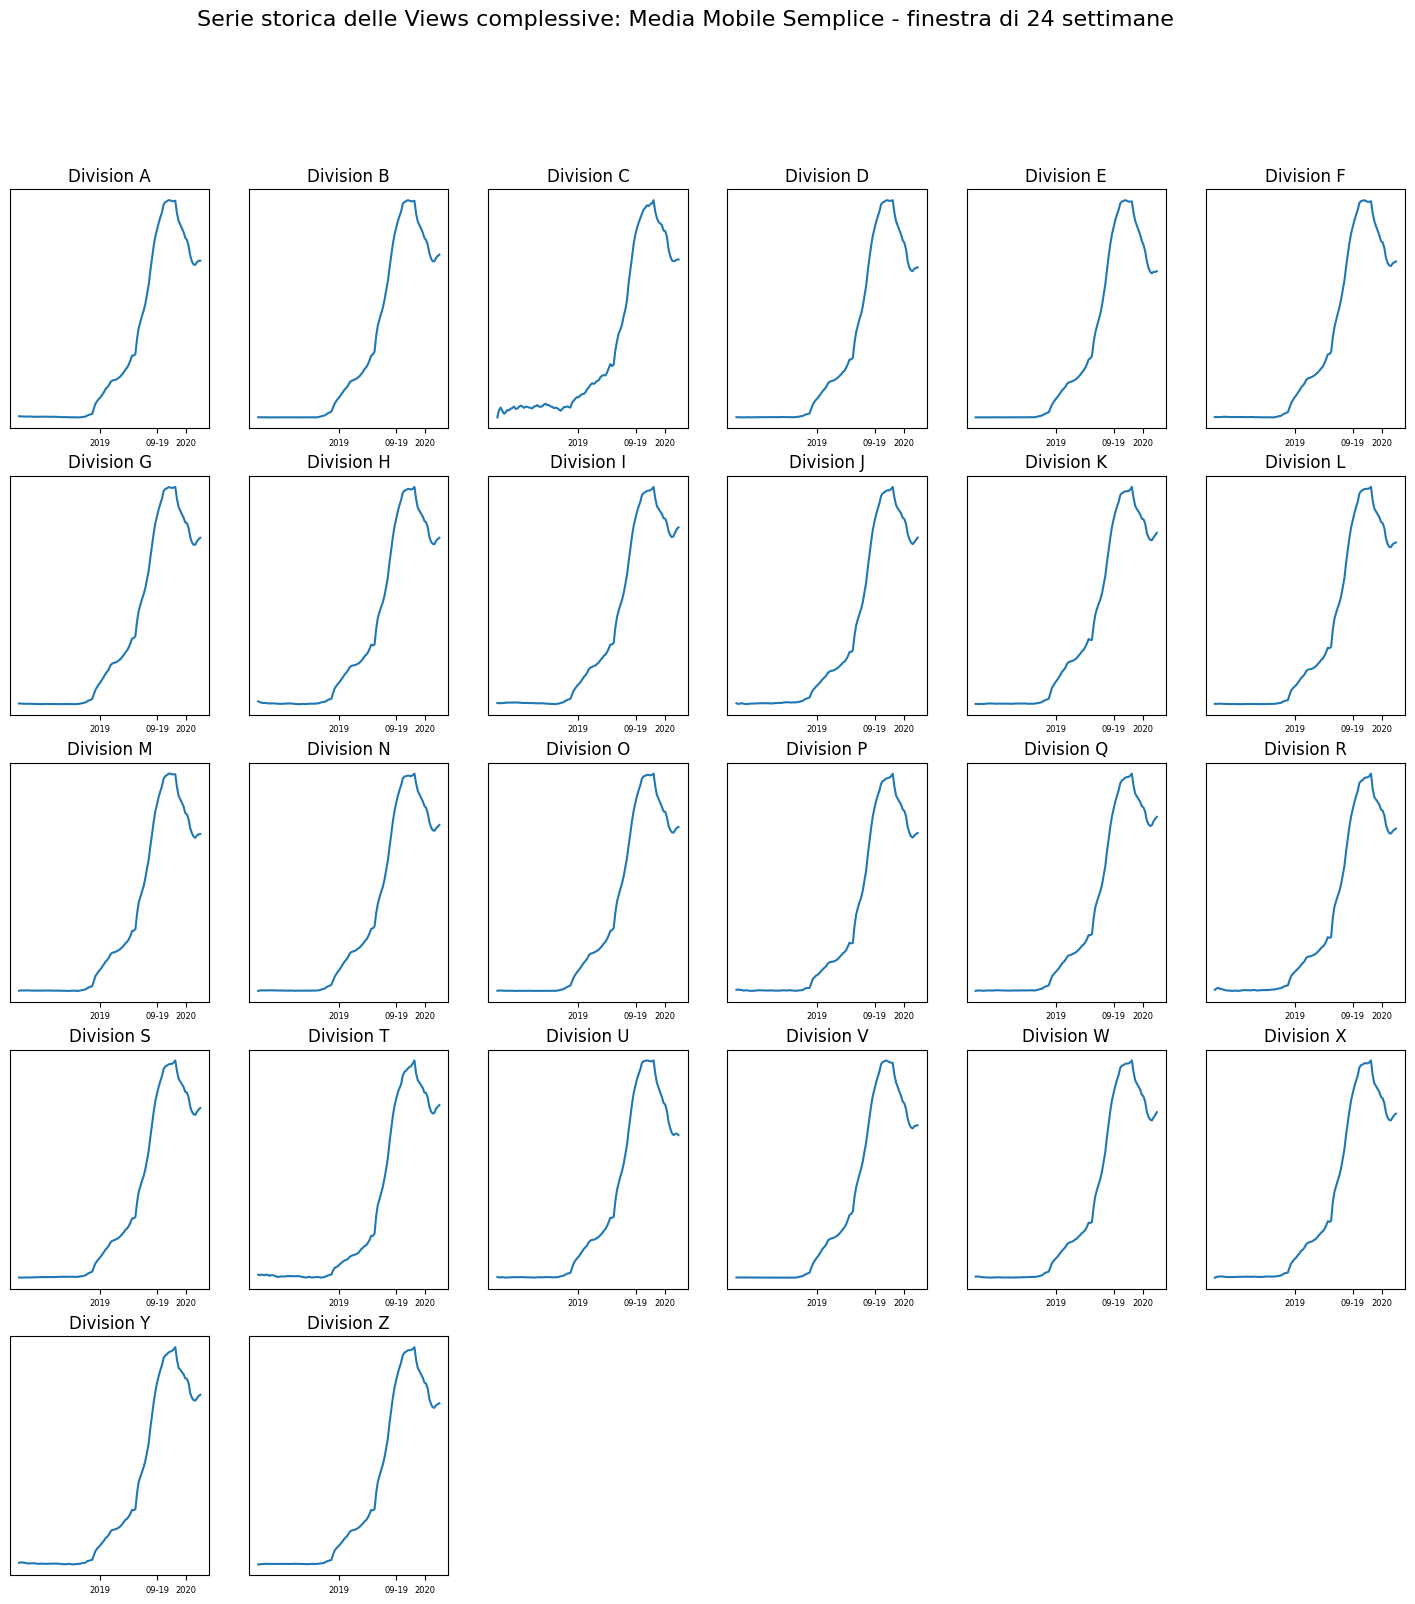

In [41]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18,18))
fig.suptitle('Serie storica delle Views complessive: Media Mobile Semplice - finestra di 24 settimane', fontsize=16)

for i, lett in enumerate(df.Division.unique().tolist()):
    riga = i//6
    colonna = i%6
    df_temp = df.loc[df["Division"] == lett]
    mean_serie = df_temp["Overall_Views"].transform(lambda x: x.rolling(window=24, min_periods=4).mean())
    axes[riga, colonna].plot(df_temp["Calendar_Week"], mean_serie, label=f"Division {lett}")
    axes[riga, colonna].set_title(f"Division {lett}")
    
    axes[riga, colonna].set_xticks([pd.to_datetime('2019-01-01'), pd.to_datetime('2019-09-01'), pd.to_datetime('2020-01-01')])
    axes[riga, colonna].set_xticklabels(['2019', '09-19', '2020'], fontsize=6,  rotation=0)    
    axes[riga, colonna].set_yticks([])


for j in range(i + 1, 5 * 6):
    fig.delaxes(axes[j // 6, j % 6])

Anche le views delle diverse divisioni rispondono allo stesso andamento nel corso delle 113 settimane registrate nel dataframe.

## Considerazioni conclusive

L'azienda in esame mostra un chiaro pattern stagionale, legando i suoi migliori risultati di vendita ai mesi freddi dell'anno (da novembre a gennaio) e flessioni nelle vendite negli altri mesi; le diverse divisioni, pur attestandosi su volumi differenti, mantengono tra loro una coerenza nei trend dei parametri presi in esame.

Ribadendo ancora una volta il fatto che la natura merceologica dell'azienda ci è sconosciuta, è impossibile affermare se questa sia la causa principale di questa stagionalità delle vendite.
Se così fosse non ci sarebbero particolari responsabilità imputabili agli operatori aziendali ma potrebbe essere opportuna una maggior attenzione alla gestione dei flussi di cassa per evitare squilibri finanziari. 

### Verso il futuro


Come scritto precedentemente, un buon punto di partenza potrebbe essere la riprogettazione della campagna di marketing in merito alle views ottenute a pagamento, specialmente nei mesi estivi, che può avvenire ad esempio ridiscutendo il target di riferimento. 
Inoltre si potrebbe anche ipotizzare la diminuzione della pubblicità nei mesi estivi (se le cause della diminuzione delle vendite fossero esogene), ma non ridurle a 0 per evitare di essere 'dimenticati' dai consumatori. Dopotutto, quando si progetta una campagna di marketing, non è misurabile in modo perfettamente scientifico la quantità ottimale di pubblicità: questa è ottenuta anche con un po' di intuizione ed euristica, trattandosi, di fatto, di uno sweet spot.

Google, Facebook e le e-mail sono ben correlate con le vendite, il che ci dice che queste variano consistentemente assieme alle vendite (ed ovviamente nella stessa direzione) e che la strategia associata è già efficace; la priorità resta quella descritta sopra.

__In merito alle divisioni__:

si è sottolineato come alcune divisioni garantiscano volumi di vendita più alti di altre (specialmente la B) ma questa variabilità non è necessariamente innaturale o corregibile; discorso diverso, invece, per l'efficienza, parametro secondo il quale notiamo una vera e propria divisione in 3: un gruppo di grandi performer 
__B, S, Q, V, O, G__ , un gruppo di underperformer __T, H, A__ e tutte le altre che si attestano presso la stessa scala di valore.
Sarà opportuno indagare ulteriormente su eventuali margini di crescita delle 'ultime' divisioni (così come quelle al centro della distribuzione) e consolidare, invece, l'andamento delle top performer.

